In [372]:
%matplotlib inline
import numpy as np
import matplotlib
import pylab
from matplotlib.patches import Path, PathPatch
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rc('font', family='serif')
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

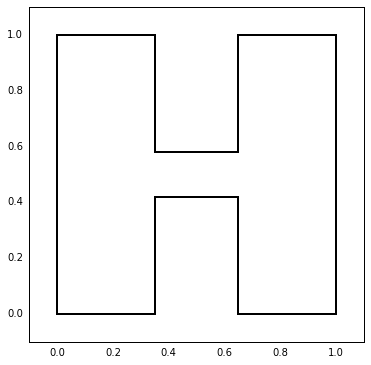

In [58]:

l, r = 0.35, 0.65
b, t = 0.42, 0.58
verts = [
    [0., 0.],
    [0., 1.0],
    [l, 1],
    [l, t],
    [r, t],
    [r, 1.0],
    [1.0, 1.0],
    [1.0, 0.0],
    [r, 0.0],
    [r, b],
    [l, b],
    [l, 0.0],
    ]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
patch = Polygon(verts, facecolor='none', lw=2)
ax.add_patch(patch)
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
plt.grid(False)

In [411]:
t = np.zeros((2000, 2))
t[0] = [0.2, 0.8]
vertexPath = Path(verts)
random = np.random.RandomState(6)
DT_SQRT_2D = 0.01

for i in range(1, len(t)):
    rp = t[i-1] + 0.01*random.normal(size=(2,))
    while not vertexPath.contains_point(rp):
        rp = t[i-1] + DT_SQRT_2D*random.normal(size=(2,))
    t[i] = rp

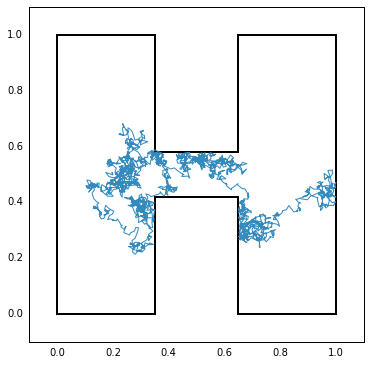

In [178]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
patch = Polygon(verts, facecolor='none', lw=2)
ax.add_patch(patch)
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
plt.grid(False)
plt.plot(t[:,0], t[:,1])

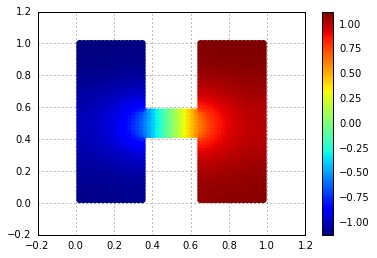

In [312]:
import scipy.spatial.distance

X, Y = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 50))
x = np.ravel(X)
y = np.ravel(Y)
xy = np.vstack([x, y]).T
mask = vertexPath.contains_points(xy)
xy = xy[mask, :]

dist = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(xy))
min_d = np.min(dist[dist>0])

plt.scatter(xy[:,0], xy[:,1])

ONE_OVER_SQRT_2PI = 1.0 / (np.sqrt(2 * np.pi))
normalpdf = lambda x: ONE_OVER_SQRT_2PI * np.exp(-0.5 * (x * x))
transmat = np.zeros((len(xy), len(xy)))
for i in range(len(xy)):
    for j in range(len(xy)):
        if np.abs(dist[i,j]-min_d) < 1e-10:
            transmat[i, j] += normalpdf(diff)
    transmat[i, :] = transmat[i, :] / np.sum(transmat[i, :])


from msmbuilder.msm.core import _solve_msm_eigensystem
u, _, rv = _solve_msm_eigensystem(transmat, k=len(transmat)-1)


colors = rv[:,1]
#print(colors)
plt.scatter(xy[:,0], xy[:,1], c=colors, s=50, edgecolor='none')
plt.colorbar()

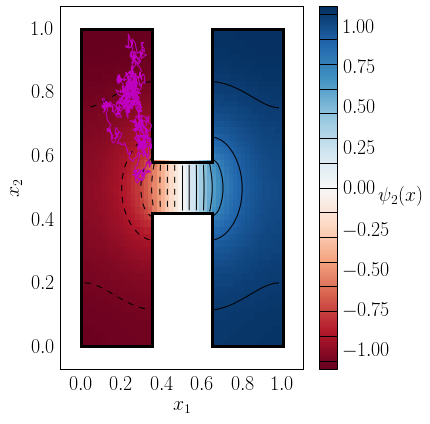

In [413]:
z = np.ones(len(x))
z.fill(np.nan)
z[mask] = colors
Z = np.reshape(z, (X.shape[0], X.shape[1]))
Z[Y==1] = np.nan


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
patch = Polygon(verts, facecolor='none', lw=3)
ax.add_patch(patch)
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
plt.grid(False)
plt.plot(t[:1000,0], t[:1000,1], c='m')
pylab.imshow(Z, aspect='auto', origin='lower', interpolation='nearest', extent=(0-1/50, 1+1/50, 0-1/50, 1+1/50), cmap='RdBu')
cb = plt.colorbar()

m = np.nanmin(Z)+0.05
contour = plt.contour(X, Y, Z, np.linspace(m,-m,15), colors='k')
cb.set_label(r'$\psi_2(x)$', fontsize=20, rotation=0, labelpad=10)
cb.add_lines(contour)

plt.xlabel('$x_1$', fontsize=20)
plt.ylabel('$x_2$', fontsize=20)
plt.ylim(-0.07, 1.07)
plt.tight_layout()
plt.savefig('H_eigenfunction.pdf')
plt.show()